In [2]:
source("common.R")

levels <- c("Activity not limited", "Activity limited a little", "Activity limited a lot")

df <-
  read_csv("data/tidy_ons_longcovid.csv", show_col_types = F)%>%
  filter(Domain == "Age group")%>%
  select(`Impact on daily activity`, midpoint_date, Group, Estimate)%>%
  mutate(`Impact on daily activity` = factor(`Impact on daily activity`, levels = levels))

df%>%head

Impact on daily activity,midpoint_date,Group,Estimate
<fct>,<date>,<chr>,<dbl>
Activity not limited,2023-02-19,2 to 11,8
Activity not limited,2023-02-19,12 to 16,10
Activity not limited,2023-02-19,17 to 24,19
Activity not limited,2023-02-19,25 to 34,41
Activity not limited,2023-02-19,35 to 49,112
Activity not limited,2023-02-19,50 to 69,151


Warning message:
“Removed 19 rows containing non-finite values (`stat_align()`).”
Warning message:
“Removed 19 rows containing non-finite values (`stat_align()`).”
Warning message:
“Removed 19 rows containing non-finite values (`stat_align()`).”


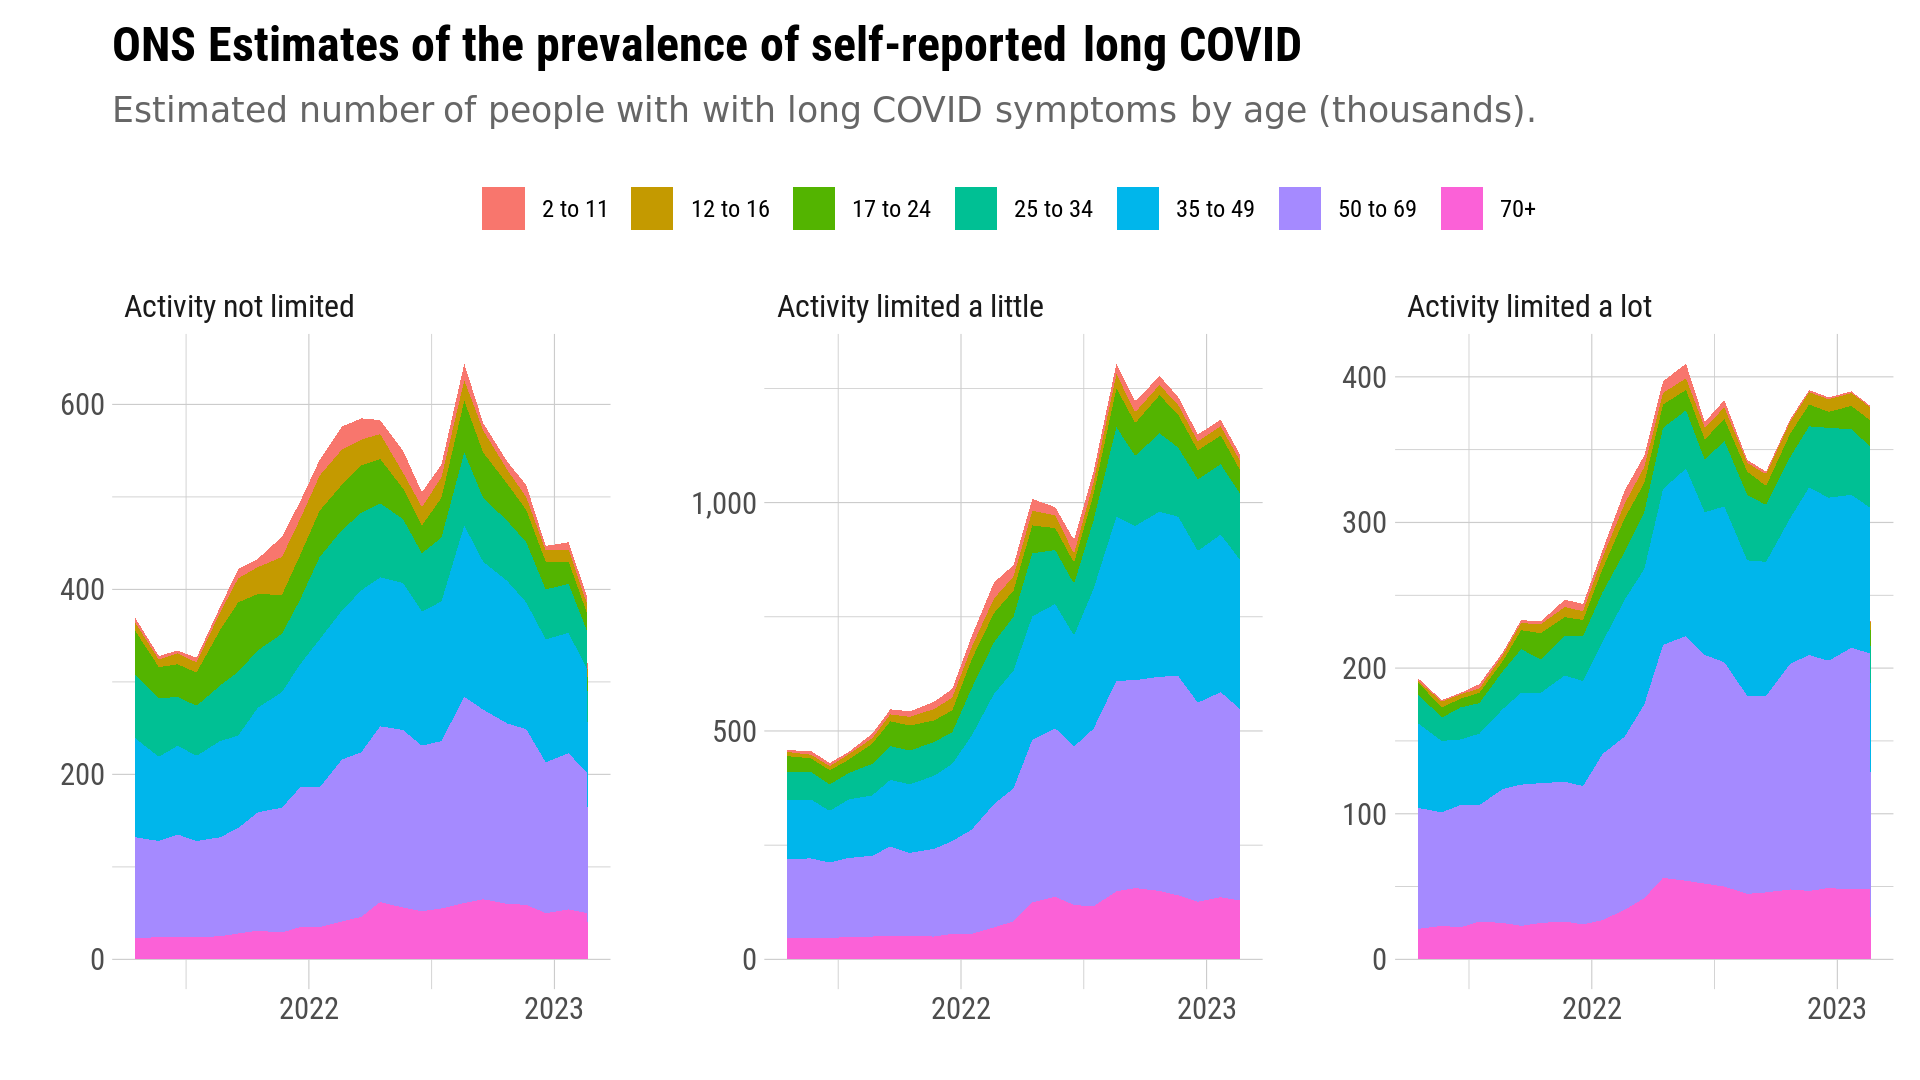

In [3]:
s = 1.25
options(repr.plot.width = s*8, repr.plot.height = s*4.5, repr.plot.res = 240/s)

df%>%
  ggplot(aes(x = midpoint_date, y = Estimate, 
             fill = reorder(Group, parse_number(Group)))) + 
  labs(title = "ONS Estimates of the prevalence of self-reported long COVID",
       subtitle = "Estimated number of people with with long COVID symptoms by age (thousands).",
       fill = "", x = "", y = "") +
  geom_area() +
  scale_x_date(date_breaks = "1 year", date_labels = "%Y") +
  scale_y_continuous(labels = scales::comma) +
  facet_wrap(~`Impact on daily activity`, nrow = 1, scale = "free_y") +
  theme(legend.position  = "top") +
  guides(fill=guide_legend(nrow = 1)) +
  savePlot("ONS_LC_age1")

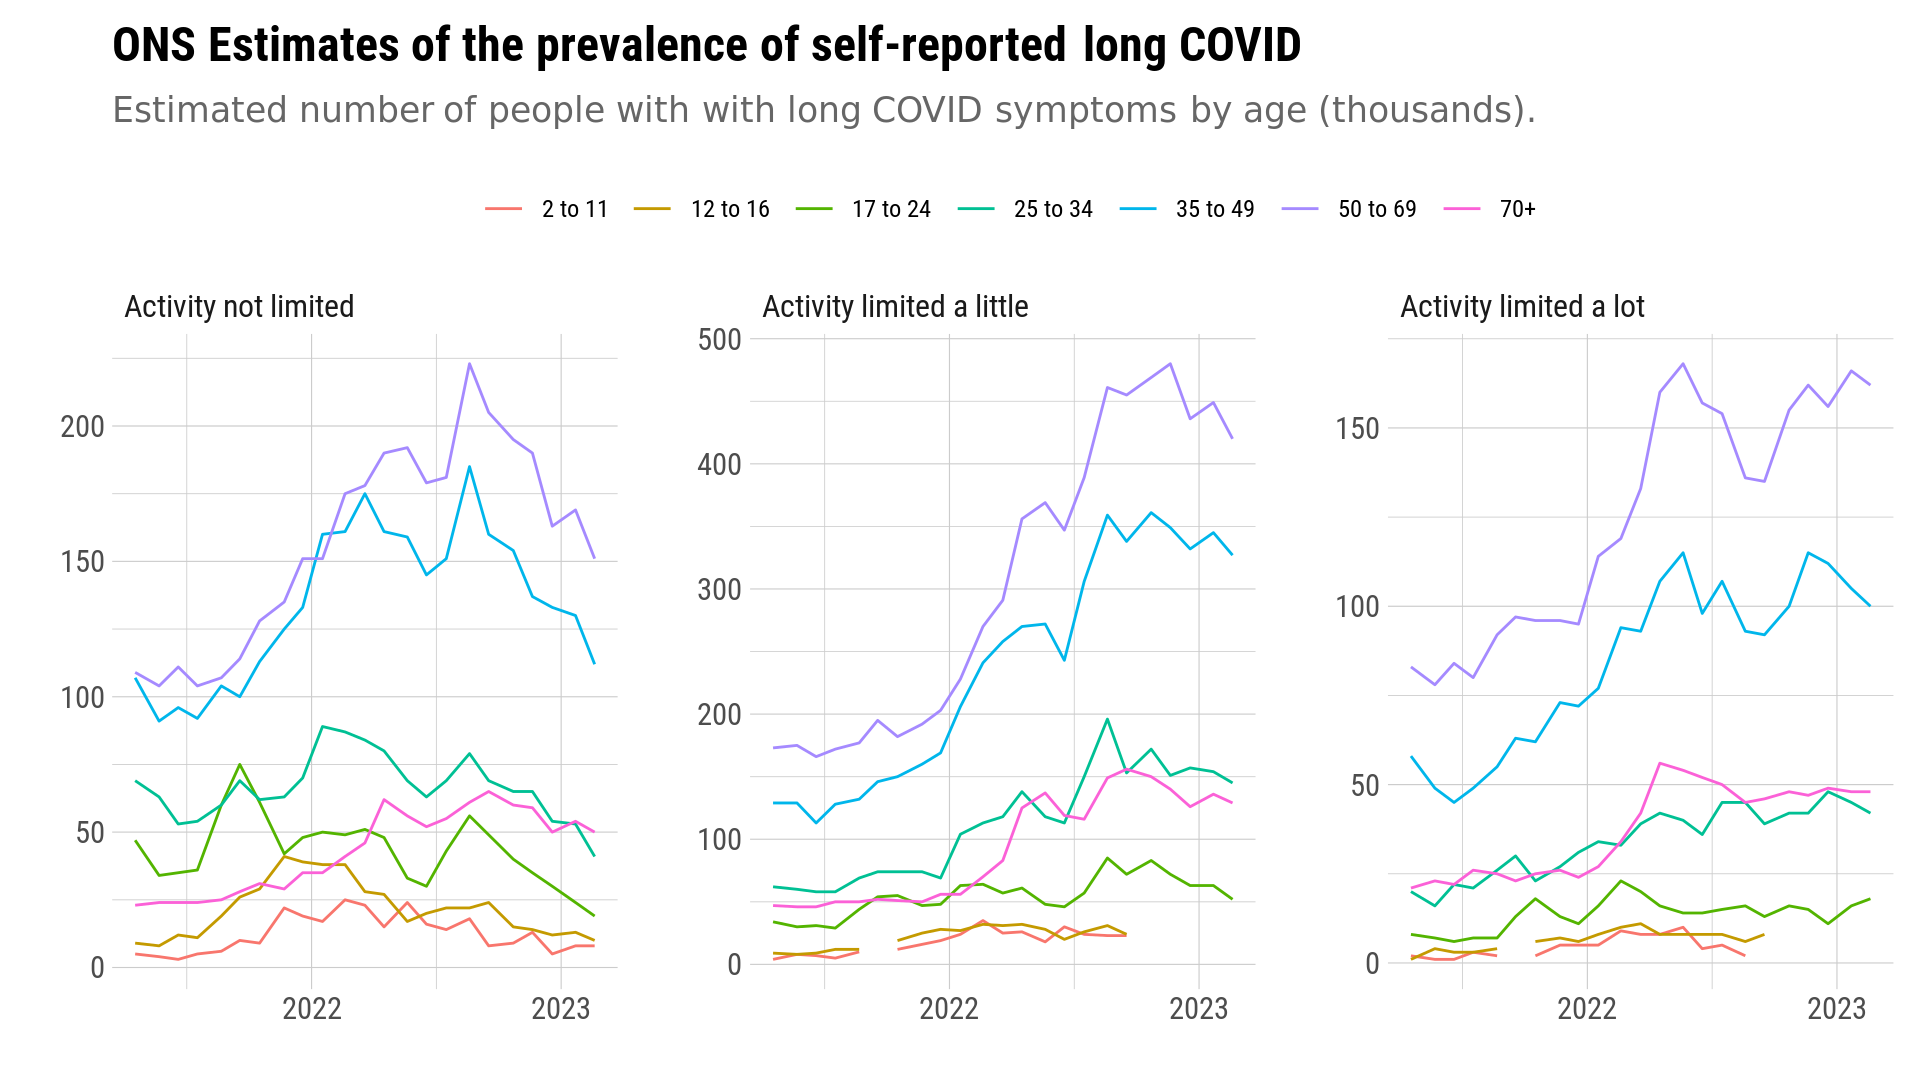

In [4]:
s = 1.25
options(repr.plot.width = s*8, repr.plot.height = s*4.5, repr.plot.res = 240/s)

df%>%
  ggplot(aes(x = midpoint_date, y = Estimate, 
             color = reorder(Group, parse_number(Group)))) + 
  labs(title = "ONS Estimates of the prevalence of self-reported long COVID",
       subtitle = "Estimated number of people with with long COVID symptoms by age (thousands).",
       color = "", x = "", y = "") +
  geom_line() +
  scale_x_date(date_breaks = "1 year", date_labels = "%Y") +
  scale_y_continuous(labels = scales::comma) +
  facet_wrap(~`Impact on daily activity`, nrow = 1, scale = "free_y") +
  theme(legend.position  = "top") +
  guides(color = guide_legend(nrow = 1)) +
  savePlot("ONS_LC_age2")

Warning message:
“Removed 19 rows containing non-finite values (`stat_align()`).”
Warning message:
“Removed 19 rows containing non-finite values (`stat_align()`).”
Warning message:
“Removed 19 rows containing non-finite values (`stat_align()`).”


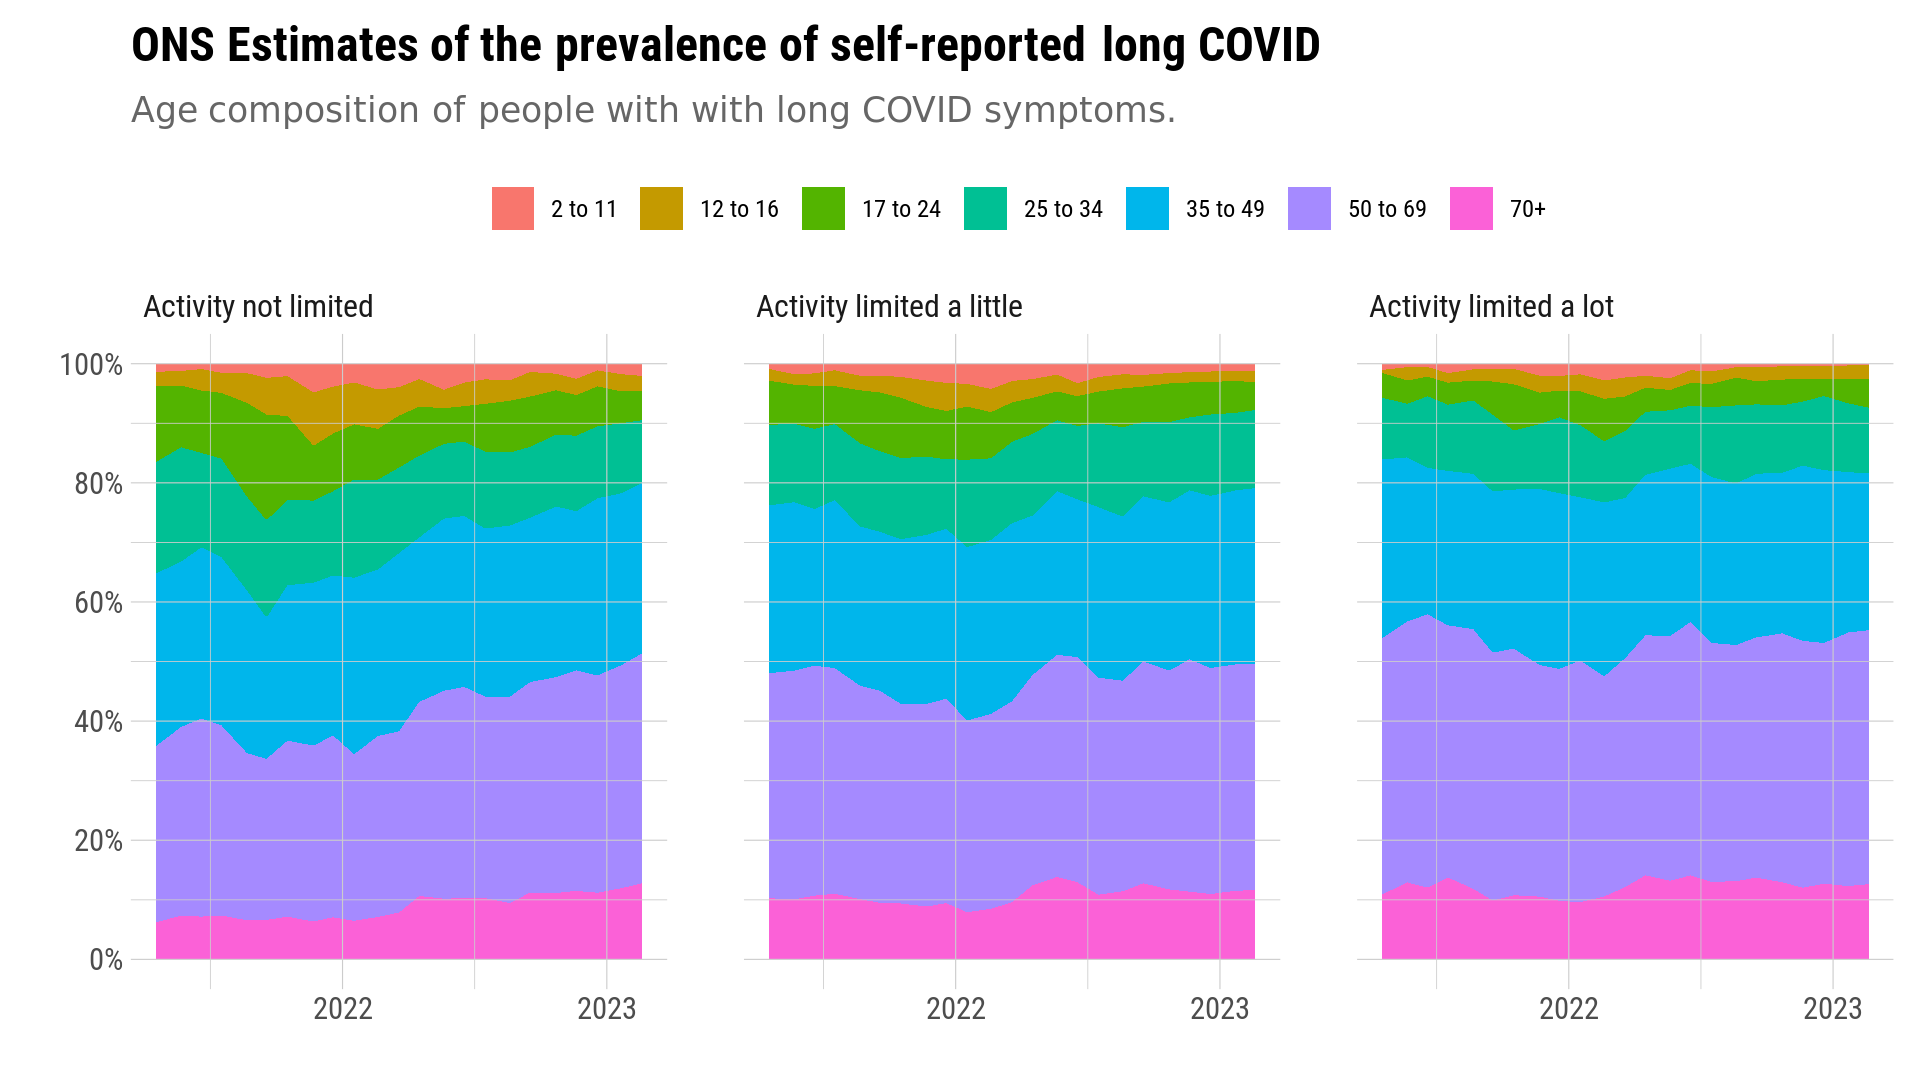

In [5]:
s = 1.25
options(repr.plot.width = s*8, repr.plot.height = s*4.5, repr.plot.res = 240/s)

df%>%
  ggplot(aes(x = midpoint_date, y = Estimate*1000, 
             fill = reorder(Group, parse_number(Group)))) + 
  labs(title = "ONS Estimates of the prevalence of self-reported long COVID",
       subtitle = "Age composition of people with with long COVID symptoms.",
       fill = "", x = "", y = "") +
  geom_area(position = "fill") +
  scale_x_date(date_breaks = "1 year", date_labels = "%Y") +
  scale_y_continuous(labels = scales::percent, breaks = seq(0, 1, 0.2)) +
  facet_wrap(~`Impact on daily activity`, nrow = 1) +
  theme(legend.position  = "top", panel.ontop = TRUE) +
  guides(fill = guide_legend(nrow = 1)) +
  savePlot("ONS_LC_age_share")